#Loading Libraries

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')


# Loading and exploring the dataset

In [ ]:
#Loading the data
train = pd.read_csv('/content/training.csv')

#Display the first few rows of the dataframe
display('Train Sample:', train.head())

'Train Sample:'

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [ ]:
#Checking the dimesnsions of the dataset
print('The number of rows are ',train.shape[0],'\n''The number of columns (variables) are',train.shape[1])

The number of rows are  12906 
The number of columns (variables) are 83


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

## Dataset Overview

Here are key insights derived from the initial exploration of the dataset:

### Size and Structure
- **Entries**: 12,906 patients.
- **Attributes**: 83 attributes per patient, encompassing a mix of numerical and categorical data.

### Missing Values
- **Significant missing data** in columns such as `patient_race`, `payer_type`, `bmi`, `metastatic_first_novel_treatment`, and `metastatic_first_novel_treatment_type`.
- Environmental indicators like `Ozone`, `PM25`, and `N02` also show missing entries, which need to be addressed for comprehensive analyses.

### Data Types
- **Numeric Columns**: 68 (including both integers and floating-point numbers).
- **Categorical Columns**: 11, which includes textual or nominal data, requiring encoding for many analytical methods.

### Key Features
- **Demographics**: Includes detailed demographic data like age, gender, and race.
- **Geographic Data**: State, region, and zip code information for location-based analysis.
- **Health and Treatment Data**: Detailed codes and descriptions for breast cancer diagnoses, metastatic conditions, and treatment specifics.
- **Socioeconomic Indicators**: Includes a variety of indicators such as income, education, employment, housing, and insurance status.

### Environmental Indicators
- Includes measurements like ozone (O3), fine particulate matter (PM2.5), and nitrogen dioxide (NO2) levels, which may correlate with health outcomes.

### Target Variable
- **DiagPeriodL90D**: Indicates whether the diagnosis period was less than 90 days, serving as the target variable for predictive modeling tasks.

In [ ]:
train.describe().T.style.background_gradient().format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,3941.00,28.98,5.70,14.00,24.66,28.19,32.92,85.00
population,12905.00,20744.44,13886.90,635.55,9463.90,19154.19,30021.28,71374.13
density,12905.00,1581.95,2966.31,0.92,171.86,700.34,1666.52,21172.00
age_median,12905.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12905.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12905.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


## Key Insights from Dataset Summary

- **Patient Data Coverage**: The dataset contains 12,906 entries, with patients' ages ranging from 18 to 91 years, indicating a broad age distribution. The gender distribution is nearly balanced with approximately 50% male and 50% female.

- **Geographic Diversity**: Zip codes range from 101 to 999, suggesting a wide geographic spread across different areas.

- **Environmental Indicators**: Average values for environmental factors like Ozone (39.82), PM2.5 (7.48), and NO2 (16.10) vary, which may impact health outcomes analyzed.

- **Economic Indicators**: Median household income is about $74,374 with a high homeownership rate at around 66%, pointing to a relatively affluent demographic.

- **Educational Attainment**: Around 31.53% of the population holds a college degree or higher, suggesting a well-educated cohort.

- **Health Metrics**: Only a subset of patients (3,941) have BMI data recorded, with an average BMI of 28.98, indicating a tendency towards overweight conditions.

- **Data Completeness**: Significant data gaps exist, notably in `bmi` and `metastatic_first_novel_treatment` fields, which are crucial for detailed health analyses.

In [ ]:
#Categorical Columns
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


## Summary of Key Categorical Data

The following highlights address important trends and notable observations within key categorical columns of the dataset:

- **Patient Race**:
  - Available for 6,521 patients, with 'White' as the predominant race, accounting for 3,558 occurrences. This suggests a significant representation of this demographic.

- **Payer Type**:
  - Among 11,103 entries with data, 'COMMERCIAL' is the most common payer type, indicating that a large portion of patients have commercial health insurance.

- **Patient State**:
  - Data spans all 50 states with California (CA) having the highest concentration of cases (2,438), pointing to higher data collection or incidence rates in this state.

- **Breast Cancer Diagnosis**:
  - The dataset details 50 unique breast cancer diagnosis codes. The code '1749' and its corresponding description 'Malignant neoplasm of breast (female), unspecified' appear most frequently (1,982 times), highlighting commonality in diagnosis entries.

- **Metastatic Cancer Diagnosis**:
  - 'C773' is notably frequent among the 43 unique metastatic cancer diagnosis codes, appearing 7,052 times, indicating a prevalent focus within the dataset.


# Handling Missing Values

In [ ]:
#Clean up data by making sure 'nan' string values are converted to actual NaN values
train.replace('nan', np.nan, inplace=True)

#Calculate total missing values
total_missing = train.isnull().sum().sum()
total_cells = np.product(train.shape)
missing_percentage = (total_missing / total_cells) * 100

#Print the summary of missing data
print("The total number of missing values are {0}{1}{2}{3}, which is {0}{4:.2f}%{3} of total data.".format('\033[1m\033[91m', total_missing, '\033[0m', '\033[1m\033[0m', missing_percentage))

The total number of missing values are 43292, which is 4.04% of total data.


In [ ]:
#Calculate percentage of missing values for each column
missing_info = train.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

#Define text styles for printing
RED, BOLD, RESET = '\033[91m', '\033[1m', '\033[0m'

#Print formatted output
for column, missing_percentage in missing_info.items():
    missing_count = train[column].isna().sum()
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{missing_count}{RESET} missing values, "
          f"which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")

metastatic_first_novel_treatment has 12882 missing values, which is 99.81% of the column.
metastatic_first_novel_treatment_type has 12882 missing values, which is 99.81% of the column.
bmi has 8965 missing values, which is 69.46% of the column.
patient_race has 6385 missing values, which is 49.47% of the column.
payer_type has 1803 missing values, which is 13.97% of the column.
Region has 52 missing values, which is 0.40% of the column.
Division has 52 missing values, which is 0.40% of the column.
patient_state has 51 missing values, which is 0.40% of the column.
PM25 has 29 missing values, which is 0.22% of the column.
Ozone has 29 missing values, which is 0.22% of the column.
N02 has 29 missing values, which is 0.22% of the column.
income_household_75_to_100 has 4 missing values, which is 0.03% of the column.
income_household_150_over has 4 missing values, which is 0.03% of the column.
income_household_15_to_20 has 4 missing values, which is 0.03% of the column.
income_household_20_t

## Summary of Missing Data in Key Columns

The dataset exhibits significant data sparsity in several critical fields, particularly related to health treatments and demographic information. Here are the columns with the most substantial missing data:

- **Metastatic First Novel Treatment**:
  - **Missing Values**: 12,882 (99.81% of the column)
  - This column records the first novel treatment for metastatic cancer, crucial for advanced treatment analysis.

- **Metastatic First Novel Treatment Type**:
  - **Missing Values**: 12,882 (99.81% of the column)
  - Indicates the type of first novel treatment for metastatic cancer, similarly critical for understanding treatment patterns.

- **BMI (Body Mass Index)**:
  - **Missing Values**: 8,965 (69.46% of the column)
  - BMI is a key health indicator, and its absence can significantly impact studies related to patient health outcomes.

- **Patient Race**:
  - **Missing Values**: 6,385 (49.47% of the column)
  - Patient race is vital for demographic studies and understanding disparities in health outcomes.

- **Payer Type**:
  - **Missing Values**: 1,803 (13.97% of the column)
  - Reflects the type of health insurance coverage, important for financial and access-to-care analyses.


In [ ]:
#Dropping columns with more than 65% missing values
threshold = 65
cols_to_drop = train.columns[train.isnull().mean() > (threshold / 100)]
print(cols_to_drop)
train.drop(columns=cols_to_drop, inplace=True)

Index(['bmi', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type'],
      dtype='object')


In [ ]:
#Numeric columns: Impute with the median
for col in train.select_dtypes(include=['float64', 'int64']).columns:
    train[col].fillna(train[col].median(), inplace=True)

#Categorical columns: Impute with the mode
for col in train.select_dtypes(include=['object']).columns:
    train[col].fillna(train[col].mode()[0], inplace=True)

In [ ]:
#Check for any remaining missing values in each column
remaining_missing = train.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]  # Filter columns that still have missing values
if remaining_missing.empty:
    print("No missing values found in the dataset.")
else:
    print("Remaining Missing Values Per Column:")
    print(remaining_missing)

No missing values found in the dataset.


In [ ]:
train.describe().T.style.background_gradient().format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
population,12906.00,20744.32,13886.37,635.55,9463.90,19154.19,30021.28,71374.13
density,12906.00,1581.88,2966.20,0.92,171.86,700.34,1666.52,21172.00
age_median,12906.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12906.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12906.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12906.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10
age_30s,12906.00,12.86,2.32,1.50,11.29,12.44,14.03,25.47


# Checking the distribution of numerical columns

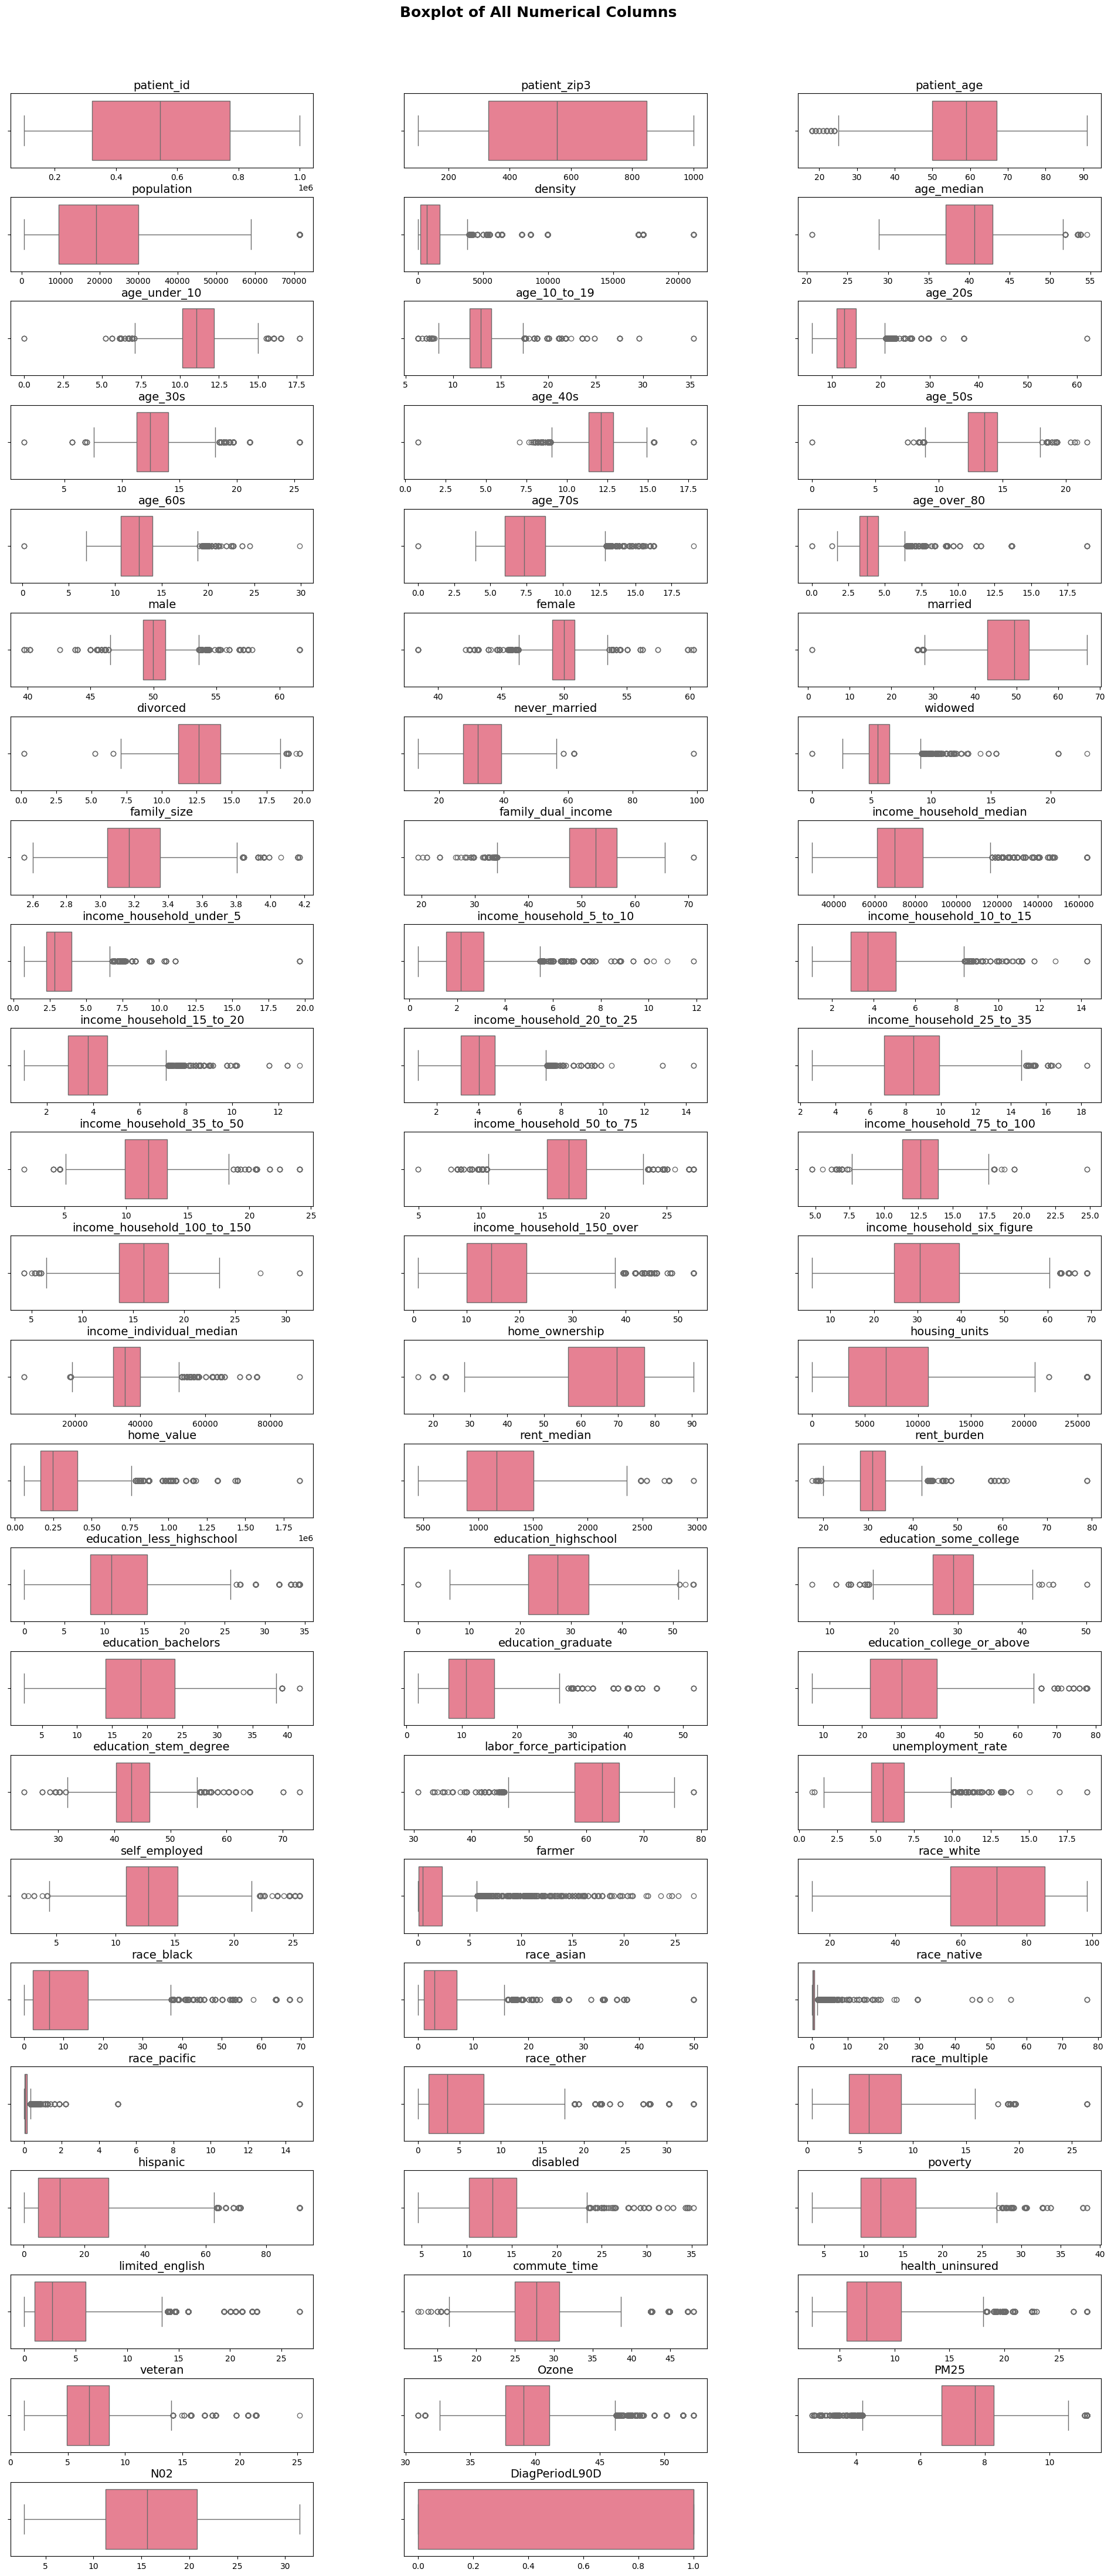

In [ ]:
#Selecting numerical columns only
train_num = train.select_dtypes(include=['int64', 'float64'])

#Setting plot parameters
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

#Define the figure for plotting
fig, axes = plt.subplots(nrows=len(train_num.columns) // 3 + 1, ncols=3, figsize=(24, 50))
fig.suptitle('Boxplot of All Numerical Columns', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)

#Loop through the numerical columns and create a boxplot for each
for i, col in enumerate(train_num.columns):
    row = i // 3
    col_num = i % 3
    sns.boxplot(data=train, x=train_num[col], ax=axes[row, col_num], palette="husl").set_title(f'{col}', fontsize=14)
    axes[row, col_num].set_xlabel('')
    axes[row, col_num].set_ylabel('')

#Hide empty subplots
for j in range(i + 1, len(axes.flatten())):
    axes.flatten()[j].set_visible(False)

plt.show()

# Checking the distribution of Categorical Columns in the dataset

In [ ]:
#Function to print value counts in markdown table format
def print_markdown_table(df, column_name):
    print(f"Value counts for column '{column_name}':")
    print("+--------------------+-------+------------+")
    print("|       Value        | Count | Percentage |")
    print("+--------------------+-------+------------+")

    #Calculating value counts and percentages
    counts = df[column_name].value_counts(dropna=False).head(10)
    percentages = df[column_name].value_counts(normalize=True, dropna=False) .head(10)* 100

    for value, count in counts.items():
        percentage = percentages[value]
        print(f"| {value:<18} | {count:<5} | {percentage:10.2f}% |")

    print("+--------------------+-------+------------+")
    print("=" * 48)


#List of categorical columns to process
categorical_cols = train.select_dtypes(include=['object']).columns

#Generate markdown tables for each categorical column
for col in categorical_cols:
    if col in train.columns:
        print_markdown_table(train, col)

Value counts for column 'patient_race':
+--------------------+-------+------------+
|       Value        | Count | Percentage |
+--------------------+-------+------------+
| White              | 9973  |      77.27% |
| Black              | 1056  |       8.18% |
| Hispanic           | 829   |       6.42% |
| Other              | 683   |       5.29% |
| Asian              | 365   |       2.83% |
+--------------------+-------+------------+
Value counts for column 'payer_type':
+--------------------+-------+------------+
|       Value        | Count | Percentage |
+--------------------+-------+------------+
| COMMERCIAL         | 7835  |      60.71% |
| MEDICAID           | 2569  |      19.91% |
| MEDICARE ADVANTAGE | 2502  |      19.39% |
+--------------------+-------+------------+
Value counts for column 'patient_state':
+--------------------+-------+------------+
|       Value        | Count | Percentage |
+--------------------+-------+------------+
| CA                 | 2489  |      1

We will drop the patient gender column as there is only 1 gender present and it adds no variability to the data.

In [ ]:
#Drop the 'patient_gender' column
train.drop('patient_gender', axis=1, inplace=True)

#Approach 1

Using simple models like Logistic Regression, Random Forest, SVM, Gradient Boosting.

# Model Training and Evaluation

In [ ]:
#Selecting categorical columns
categorical_cols = train.columns[train.dtypes == object]

#Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))

#Define features and target
X = train.drop(['DiagPeriodL90D'], axis=1)
y = train['DiagPeriodL90D']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




In [ ]:
#List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=1000, random_state=42)),
    ('SVM', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
]


In [ ]:
#Dictionary to hold ROC data
roc_data = {}

#Train each model and calculate ROC AUC
for name, model in models:
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)
    print(f"{name} AUC: {roc_auc:.2f}")
    print(classification_report(y_test, model.predict(X_test)))


Logistic Regression AUC: 0.75
              precision    recall  f1-score   support

           0       0.73      0.61      0.66       970
           1       0.78      0.86      0.82      1612

    accuracy                           0.77      2582
   macro avg       0.76      0.74      0.74      2582
weighted avg       0.76      0.77      0.76      2582

Random Forest AUC: 0.77
              precision    recall  f1-score   support

           0       0.76      0.57      0.65       970
           1       0.78      0.89      0.83      1612

    accuracy                           0.77      2582
   macro avg       0.77      0.73      0.74      2582
weighted avg       0.77      0.77      0.76      2582

Gradient Boosting AUC: 0.78
              precision    recall  f1-score   support

           0       0.81      0.58      0.67       970
           1       0.78      0.92      0.85      1612

    accuracy                           0.79      2582
   macro avg       0.80      0.75      0.76   

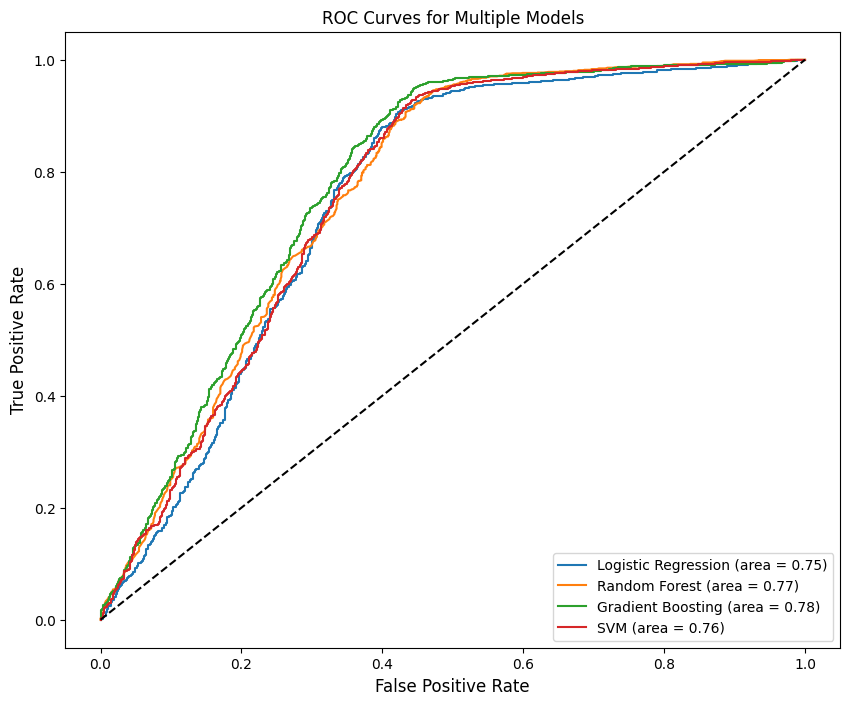

In [ ]:
#Plot ROC Curves for all models
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.show()

## Model Training and Evaluation

### Overview
We train and evaluate several machine learning models to predict whether the diagnosis period for a patient is less than 90 days based on their health and demographic data. The models include Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machine (SVM).

### Training Process
1. **Feature Selection**: We first separate our features (`X`) from the target variable (`y`), where `y` is the diagnosis period classification.
2. **Data Splitting**: The dataset is split into training and testing sets, maintaining a 20% proportion for the test set. This split is stratified by the target variable to ensure that the distribution of the target is similar across both training and test datasets.
3. **Model Training**: Each model is trained on the training data. We use a loop to process each model, where the model is fitted using the training features and labels.
4. **Prediction and Evaluation**: Post-training, each model predicts the probabilities on the test data. The probabilities are then used to calculate the ROC AUC score, which serves as the evaluation metric. This metric helps in assessing the models' ability to distinguish between the two classes (less than 90 days and not).

### Results Visualization
- **ROC Curve**: For each model, a Receiver Operating Characteristic (ROC) curve is plotted. This curve illustrates the diagnostic ability of each classifier by plotting the true positive rate against the false positive rate at various threshold settings.
- **Comparison**: The ROC curves for all models are displayed together to compare their performance visually. The area under the ROC curve (AUC) is used to quantify the overall ability of each model to discriminate between the outcomes.

Therefore, Gradient Boosting Model gave a better performance of the total 4 models.

#Approach2

Using more classification models, hyperparameter tuning, and ensemble

In [32]:
#Dropping target variable from features
if 'DiagPeriodL90D' in train.columns:
    features = train.drop(['DiagPeriodL90D'], axis=1)
else:
    features = train.copy()

#Separating categorical and numeric features
categorical_columns = features.select_dtypes(include=['object']).columns.tolist()
numeric_columns = features.select_dtypes(include=[np.number]).columns.tolist()

#Preprocessor for both types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

#Apply transformation
X_processed = preprocessor.fit_transform(features)
y = train['DiagPeriodL90D'].values

### Data Preparation and Preprocessing

**Dropping Target Variable:**
- The target variable `DiagPeriodL90D` is removed from the training set to separate features from the target.

**Feature Categorization:**
- Features are categorized into numerical and categorical types to apply appropriate preprocessing.

**Setting up Preprocessing:**
- A `ColumnTransformer` is configured to handle different types of data:
  - Numerical data is passed through without changes.
  - Categorical data is transformed using `OneHotEncoder` to prepare it for model training.

**Data Transformation:**
- The `ColumnTransformer` applies these transformations to the feature set, and creates a processed dataset ready for training.
- The target variable is extracted into a separate array for model training.


In [33]:
#Setting up the model base and hyperparameters
models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {'C': [0.1, 1, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [10, 20]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
    },
    'SVM': {
    'model': Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('svc', SVC(probability=True, random_state=42))
    ]),
    'params': {
        'svc__C': [0.1, 1],
        'svc__gamma': ['scale', 'auto']
    }
},
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.5, 1.0]}
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0, random_state=42),
        'params': {'iterations': [100, 200], 'learning_rate': [0.05, 0.1]}
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
    }
}

### Model Configuration and Hyperparameter Setup

Setting Up Different Classification Models with Hyperparameters;

- **Logistic Regression**: Tuned for regularization strength with values [0.1, 1, 10].
- **Random Forest**: Configured with a range of trees [100, 200] and maximum depths [10, 20].
- **Gradient Boosting**: Adjusts for number of stages [100, 200] and learning rates [0.05, 0.1].
- **SVM**: Uses a pipeline for scaling and SVM classification, tuning `C` [0.1, 1] and `gamma` [scale, auto].
- **XGBoost**: Focuses on the number of trees [100, 200] and learning rate adjustments [0.05, 0.1].
- **AdaBoost**: Set for different numbers of estimators [50, 100] and learning rates [0.5, 1.0].
- **CatBoost**: Configured for iterations [100, 200] and learning rate [0.05, 0.1].
- **LightGBM**: Parameters include number of trees [100, 200] and learning rate [0.05, 0.1].

Each model is integrated into a systematic parameter optimization framework using **GridSearchCV**. This method performs exhaustive searching over specified parameter values for each model. GridSearchCV processes each combination of parameters, applies cross-validation to evaluate each set, and determines the configuration that produces the best results based on the ROC AUC metric. This approach ensures that each model is finely tuned to provide optimal performance on the given dataset.


In [34]:
#Training and tuning
roc_data = {}
best_models = []
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for name, info in models_params.items():
    print(f"Training and tuning {name}")
    grid_search = GridSearchCV(info['model'], info['params'], cv=skf, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(preprocessor.fit_transform(features), y)
    best_model = grid_search.best_estimator_
    best_models.append((name, best_model))

    #Evaluation
    X_transformed = preprocessor.transform(features)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)
    best_model.fit(X_train, y_train)
    probs = best_model.predict_proba(X_test)[:, 1]
    preds = best_model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

    print(f"{name} AUC: {roc_auc:.2f}")
    print(classification_report(y_test, preds))


Training and tuning Logistic Regression
Logistic Regression AUC: 0.75
              precision    recall  f1-score   support

           0       0.73      0.61      0.66       970
           1       0.78      0.86      0.82      1612

    accuracy                           0.77      2582
   macro avg       0.76      0.74      0.74      2582
weighted avg       0.76      0.77      0.76      2582

Training and tuning Random Forest
Random Forest AUC: 0.79
              precision    recall  f1-score   support

           0       0.89      0.55      0.68       970
           1       0.78      0.96      0.86      1612

    accuracy                           0.81      2582
   macro avg       0.84      0.75      0.77      2582
weighted avg       0.82      0.81      0.79      2582

Training and tuning Gradient Boosting
Gradient Boosting AUC: 0.80
              precision    recall  f1-score   support

           0       0.90      0.55      0.68       970
           1       0.78      0.96      0.86

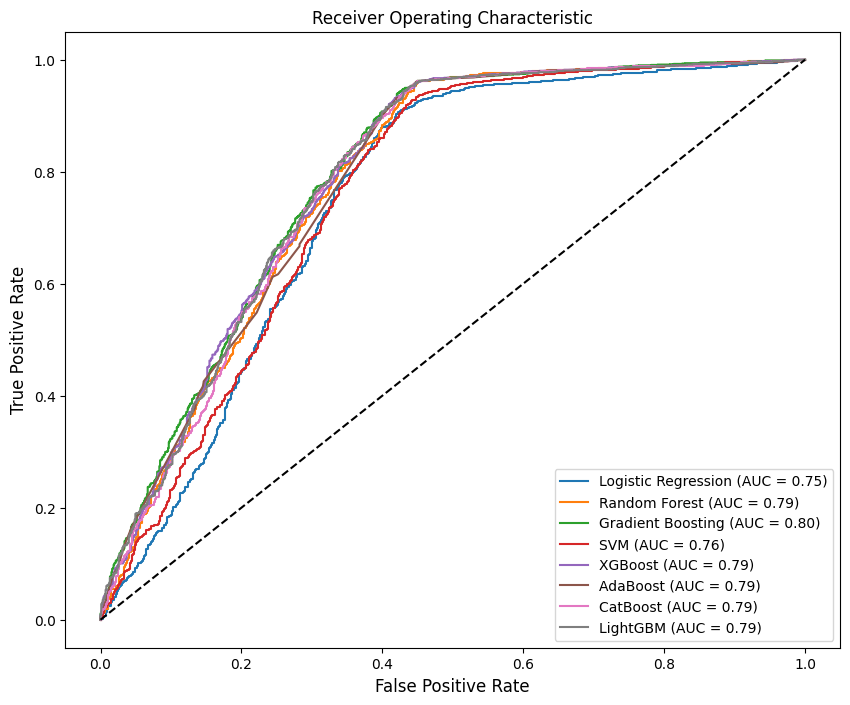

In [40]:
#Plot ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model Training and Evaluation

#### **1. Setup for Model Training and Tuning:**
- **Models and Parameters:** A dictionary (`models_params`) defines each model (e.g., Logistic Regression, Random Forest) and its potential hyperparameters for tuning.
- **Stratified K-Fold:** This cross-validation method ensures each fold of data contains a proportionate representation of the target classes, crucial for maintaining balance especially in imbalanced datasets.

#### **2. Hyperparameter Tuning with Cross-Validation:**
- **Grid Search:** For each model, `GridSearchCV` is employed to find the best combination of parameters. It tests all possible combinations of the specified hyperparameters across different folds of the data.
- **Best Model Selection:** The best model configuration for each type is determined based on the Area Under the Receiver Operating Characteristic (ROC AUC) score, which measures the model's ability to distinguish between classes.

#### **3. Model Evaluation on New Data:**
- **Data Transformation:** The entire dataset is transformed using a predefined preprocessor to ensure the model inputs are correctly formatted.
- **Train-Test Split:** The data is then split into training and testing sets. This split allows the best-tuned model to be trained on one portion of the data and tested on a completely unseen portion.
- **Model Fitting and Prediction:** Each best-tuned model is trained on the training set and then used to predict outcomes on the testing set.
- **Performance Metrics:** The model's effectiveness is evaluated using the ROC AUC score and detailed classification metrics (precision, recall, f1-score) to understand its predictive accuracy and robustness.




## Model Evaluation Summary

## Model Comparison and Selection

In our evaluation, several models were trained and assessed based on their ROC AUC score, precision, recall, and f1-scores, important metrics that measure the models ability to classify binary outcomes accurately. Logistic Regression provided a baseline performance with an AUC of 0.75. Random Forest and AdaBoost both gave an AUC of 0.79, showing a balance between sensitivity and specificity but with Random Forest achieving a slightly higher precision. The SVM model, despite normalization adjustments, reached an AUC of 0.76, slightly better than Logistic Regression.

Gradient Boosting outperformed all with the highest AUC of 0.80, showing its superior capability in distinguishing between the positive and negative classes. This model not only provided the best AUC but also maintained good precision, recall, and f1-scores across the classes, demonstrating its effectiveness in handling both classes equally well. XGBoost, CatBoost, and LightGBM, similar in approach to Gradient Boosting, all secured an AUC of 0.79, confirming the strength of gradient boosting techniques in such problems.

Given the comparative analysis, **Gradient Boosting** emerges as the optimal model for this dataset. Its leading AUC score and balanced accuracy metrics across all classes suggests that it can effectively handle varied data distributions and complexities, making it the preferred model for deploying in predictive settings.


In [37]:
#Ensemble - Voting Classifier with best models
voting_clf = VotingClassifier(estimators=best_models, voting='soft')
voting_clf.fit(X_train, y_train)
voting_probs = voting_clf.predict_proba(X_test)[:, 1]
voting_preds = voting_clf.predict(X_test)
voting_fpr, voting_tpr, _ = roc_curve(y_test, voting_probs)
voting_roc_auc = auc(voting_fpr, voting_tpr)

print("Voting Classifier AUC:", voting_roc_auc)
print(classification_report(y_test, voting_preds))


[LightGBM] [Info] Number of positive: 6448, number of negative: 3876
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17580
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624564 -> initscore=0.508966
[LightGBM] [Info] Start training from score 0.508966
Voting Classifier AUC: 0.788043923153667
              precision    recall  f1-score   support

           0       0.89      0.55      0.68       970
           1       0.78      0.96      0.86      1612

    accuracy                           0.81      2582
   macro avg       0.84      0.76      0.77      2582
weighted avg       0.82      0.81      0.79      2582



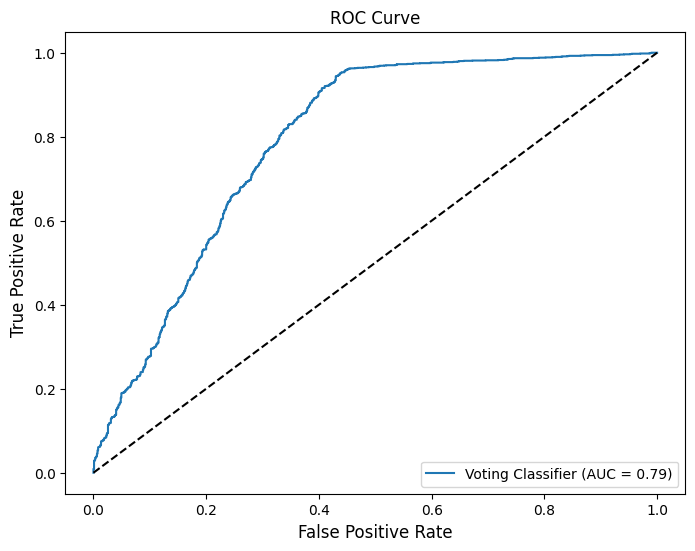

In [38]:
#Plot ROC Curve for ensemble
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Ensemble Learning and Voting Classifier

Ensemble learning is a technique that involves combining multiple models to improve the overall performance, reduce overfitting, and increase the accuracy of predictions. It uses the strengths of each individual model and often achieves better performance than any single model could on its own.

A Voting Classifier is a type of ensemble model that gathers predictions from multiple models and outputs the prediction that receives the most votes. In the context of classification, it typically uses either:
- **Hard voting:** where the predicted output class is the class with the majority of votes from all the classifiers.
- **Soft voting:** where it predicts the class labels based on the average of probabilities given to that class by each model. Soft voting is often more flexible and achieves higher performance as it takes into account the certainty of each model's predictions.

Using an ensemble like a Voting Classifier can enhance the decision-making process by integrating diverse perspectives from multiple models, thus often leading to better and more stable predictive performance on complex datasets.

## Ensemble Model Performance Summary

The **Voting Classifier** combines multiple models to improve prediction accuracy, achieving an AUC of 0.788. This shows good model performance in distinguishing between classes.

###Results:
- **Precision**: High accuracy with 0.89 for non-disease predictions and 0.78 for disease predictions.
- **Recall**: Effectively identifies 55% of non-disease cases and 96% of disease cases.
- **F1-Score**: Balanced scores of 0.68 for non-disease and 0.86 for disease, indicating a strong model performance.
- **Overall Accuracy**: The model accurately predicts outcomes 81% of the time, showing its reliability in practical scenarios.